# Volumetric rendering of a 2M++ density field in Digital Sky Dark Matter

In this notebook, we will import a 3D density field from the 2Mpp survey and convert it into a volumetric .dds texture, which can be imported into dark matter. The data file we are using comes from this [site](http://cosmicflows.iap.fr/download.html), where it is stored as a numpy array


In [1]:
import numpy as np

In [4]:
# loading the data
den = np.load('twompp_density.npy')
len(den)

257

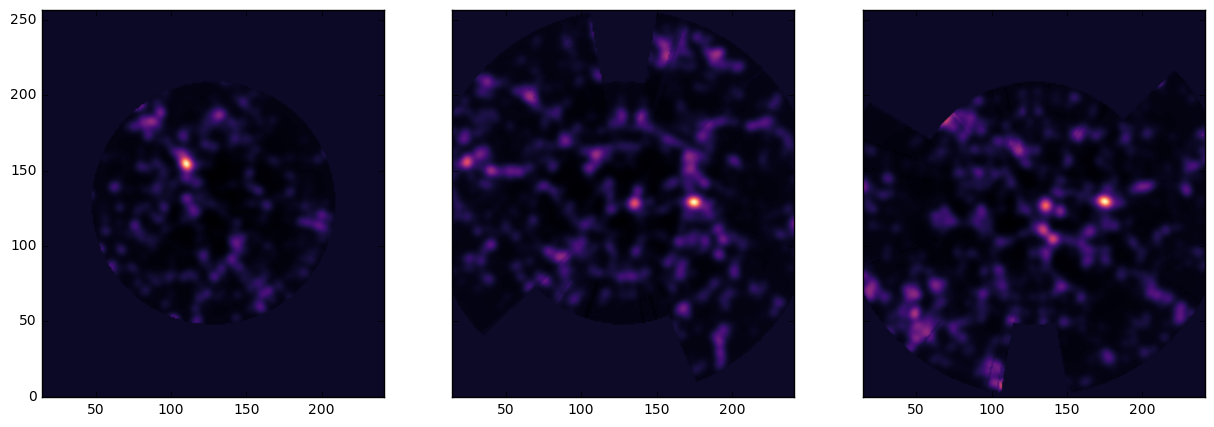

In [17]:
#Let's take a look at a couple of slices
from matplotlib import pyplot as plt
%matplotlib inline
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize=(15,5))
ax1.imshow(den[:,:,128], origin='lower',cmap="magma")
ax2.imshow(den[:,128,:], origin='lower', cmap="magma")
ax3.imshow(den[128,:,:], origin='lower',cmap="magma")
plt.show()

In [53]:
# output slices as individual 256x256 images
# note: we are reducing the cube from 257x257x257 to 250x256x256 elements to save memory
for i in range(256):
    imagePlot = plt.figimage(den[0:256,0:256,i], origin='lower',cmap="magma",vmin=0,vmax=5)
    fName=format('denImgStack/den%03d.png'%(i))
    imagePlot.write_png(fName)   

## Creating the .dds file from the image stack
To create the volumetric .dds file we will use GIMP with the DDS plugin installed. 
1. From the Gimp File menu select 'Open As Layers' and select all 236 images
2. Export the image as a .dds file
3. In the 'Save as DDS' dialog box select 'As Volume Map' under 'Save'

## Importing the volume into Dark Matter
1. In the 'Asset Manager' Create a new Volume Texture Asset b(the cibe with a ballinside icon)
2. Under Properties-> Texture3D lod the .dds file
3. Under Asset Details -> Parent select Galactic
4. Under Asset Details -> Unit select MegaPrsecs
5. Under Base Properties -> Scale enter 400 for XSCALE, YSCALE, ZSCALE
6. Under Base Properties -> Position enter 0.78125 for XPOSITION, YPOSITION, ZPOSITION

After that you should be able to adjust the visualization parameters (samples, color scale and blend mode) to get the apperance you desire. Samples should be increased to 256 at least. Other adjustments to the 'transfer function' require a change to the .dds file, in particular changing how the colormap is applied in making the individual images.

